# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#imports">Setting up the Environment</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Data Assessing</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Data Storing</a></li>
<li><a href="#vis">Analyzing and Visualizing Data</a></li>

<a id='intro'></a>
## Introduction
This project aims at manipulating the data provided from **WeRateDogs Twitter account** using different source of datasets. 
The main focus on this project will be the data evaluation and cleaning to conclude intersting insights based on the thorough analysis and visualization.
Then, data about the dogs names, rating, and beauty classification have been interpreted to provide insights as a conslusion of this analysis. 

<a id='imports'></a>
## Setting up the Environment
Here, we will be importing all the packages required for the project.

In [52]:
import pandas as pd 
import numpy as np
import requests
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Data Gathering
In the three cell below, we will gather **all** three pieces of data required, using different methods, for this project and load them in the notebook.

**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [53]:
df_csv = pd.read_csv('twitter-archive-enhanced.csv')
df_csv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [54]:
# This step requires more packages
import os
from io import StringIO

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').text
df_tsv = pd.read_csv(StringIO(response), sep='\t')
df_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

Here, in order to get data from Twitter API, it is required that Twitter Developer Account get accepted, which is not done yet at the moment of uploading the dataset. 
For that, we will rely on the second method to upload the data as from the Twitter API.

In [55]:
with open('tweet-json.txt') as f:
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])
df_api.columns = ['tweet_id', 'favorites', 'retweets']
df_api.set_index('tweet_id', inplace = True)
df_api

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774
...,...,...
666049248165822465,111,41
666044226329800704,311,147
666033412701032449,128,47


In [56]:
# Download the dataset to examine it in Google sheet for the visual assessment later on.
df_api.to_csv('df_api', sep='\t', index=False, encoding='utf-8')

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing Dataset 1: Twitter Archive Enhanced

In [57]:
df_csv
# For further visual assessment, I have opened the dataset in a Google Sheet.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [58]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [59]:
df_csv.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object>

In [60]:
df_csv['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
df_csv.shape[0]

2356

#### Assessing Dataset 2: Tweet Image Predictions

In [62]:
df_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [63]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
df_tsv.shape[0]

2075

In [65]:
df_tsv.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [66]:
df_tsv.jpg_url.duplicated().sum()

66

#### Assessing Dataset 3: Twitter API

In [67]:
df_api.shape[0]

2354

In [68]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


### Quality issues

1. Too many missing values

2. Some dogs don't have names (none) and other have random names "a" and some prediction are wrong (orange, pillow, etc)

3. Wrong datatype of timestamp (object instead of datetime)

4. Denominator different from 10 (example: 170)

5. Wrong extractions of numerators (examples: 960 instead of 13)

6. The content of the "source" column is almost the same throughout all the dataset and is an html code

7. The majority of dogs have no classification

8. Duplicate data: retweet_status_id and duplicate images

### Tidiness issues
1. Combine the Dogs' classification (doggo, floofer, pupper, and puppo) in one column instead of four columns. Also, some dogs have more than one classification.

2. The datasets have different sizes and different order (the enhanced dataset is the opposite order of the other datasets - Tweet_id). It needs to be fixed to merge them.

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [69]:
# First step requierd is to reverse the dataframe of twitter archive enhanced:
df_rev = df_csv[::-1]
df_rev.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [70]:
# Make copies of original pieces of data
df_rev_copy = df_rev.copy()
df_tsv_copy = df_tsv.copy()
df_api_copy = df_api.copy()

In [71]:
# Merging the dataframes
merge_df = df_rev_copy.merge(df_tsv_copy,on='tweet_id').merge(df_api_copy,on='tweet_id')
df = merge_df.copy()

In [72]:
df.to_csv('df.csv', index=False)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #1: Missing Values

#### Define
We will be dropping all the columns inclusing too many missing values as they won't help in the analysis later on and do not contribute with any added value to our analysis and aim except for "retweeted_status_id" because it will help in differentiating the retweets of the actual tweets.
The following columns will be dropped: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_user_id", and "retweeted_status_timestamp"

#### Code

In [74]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2073 non-null   int64  
 1   timestamp            2073 non-null   object 
 2   source               2073 non-null   object 
 3   text                 2073 non-null   object 
 4   retweeted_status_id  79 non-null     float64
 5   expanded_urls        2073 non-null   object 
 6   rating_numerator     2073 non-null   int64  
 7   rating_denominator   2073 non-null   int64  
 8   name                 2073 non-null   object 
 9   doggo                2073 non-null   object 
 10  floofer              2073 non-null   object 
 11  pupper               2073 non-null   object 
 12  puppo                2073 non-null   object 
 13  jpg_url              2073 non-null   object 
 14  img_num              2073 non-null   int64  
 15  p1                   2073 non-null   o

### Issue #2: Missing or Random Names of Dogs

#### Define: 
Many dogs have not been named or given random names like 'a' which will not allow to conclude the best dogs' names at the end of the analysis. For that, we will seperate those having names and those not.

#### Code

In [76]:
df.name.value_counts()

None       577
a           55
Charlie     11
Tucker      10
Cooper      10
          ... 
Ricky        1
Fynn         1
Durg         1
Covach       1
Tilly        1
Name: name, Length: 936, dtype: int64

In [77]:
df['name'].replace({"a":"Unknown", "None":"Unknown", "the":"Unknown", "an":"Unknown", "actually":"Unknown", "one":"Unknown", "his":"Unknown", "my":"Unknown", "not":"Unknown"}, inplace = True)
df['name'].fillna("Unknown")

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
2068    Franklin
2069       Darla
2070      Archie
2071       Tilly
2072     Phineas
Name: name, Length: 2073, dtype: object

#### Test

In [78]:
df.name.value_counts()

Unknown    654
Charlie     11
Cooper      10
Oliver      10
Penny       10
          ... 
Lucky        1
Ricky        1
Fynn         1
Durg         1
Tilly        1
Name: name, Length: 928, dtype: int64

In [79]:
df.name.isnull().sum()

0

### Issue #3: Wrong datatype of timestamp

#### Define
The datatype of timestamp is object, yet it needs to be datetime

#### Code

In [80]:
df.timestamp.dtypes

dtype('O')

In [81]:
df['timestamp'] = pd.to_datetime(df.timestamp)

#### Test

In [82]:
df.timestamp.dtypes

datetime64[ns, UTC]

In [83]:
df.timestamp

0      2015-11-15 22:32:08+00:00
1      2015-11-15 23:05:30+00:00
2      2015-11-15 23:21:54+00:00
3      2015-11-16 00:04:52+00:00
4      2015-11-16 00:24:50+00:00
                  ...           
2068   2017-07-29 16:00:24+00:00
2069   2017-07-30 15:58:51+00:00
2070   2017-07-31 00:18:03+00:00
2071   2017-08-01 00:17:27+00:00
2072   2017-08-01 16:23:56+00:00
Name: timestamp, Length: 2073, dtype: datetime64[ns, UTC]

### Issue #4: Denominator different from 10

#### Define
Having a denominator greater than 10 reflects the bad rating. 
For that:
1. Extract the denominator different from 10 
2. Fix these numbers manually based on the dataframe and what has been written manually by the writers of the rating. 

#### Code

In [84]:
diff_denominator = df[df.rating_denominator != 10].index
diff_denominator

Int64Index([  20,  501,  560,  667,  692,  693,  865,  941, 1007, 1025, 1050,
            1071, 1105, 1148, 1196, 1338, 1657, 1727],
           dtype='int64')

In [85]:
for index, row in df.iterrows():
    if row['rating_denominator'] != 10:
        df.loc[index,['rating_denominator']] = 10
df.rating_denominator.value_counts()

10    2073
Name: rating_denominator, dtype: int64

In [86]:
df.loc[666287406224695296 , 'rating_numerator'] = 9
df.loc[675853064436391936 , 'rating_numerator'] = 11
df.loc[677716515794329600 , 'rating_numerator'] = 12
df.loc[682962037429899265 , 'rating_numerator'] = 10
df.loc[684222868335505415 , 'rating_numerator'] = 11
df.loc[684225744407494656 , 'rating_numerator'] = 11
df.loc[697463031882764288 , 'rating_numerator'] = 11
df.loc[704054845121142784 , 'rating_numerator'] = 12
df.loc[709198395643068416 , 'rating_numerator'] = 9
df.loc[710658690886586372 , 'rating_numerator'] = 10
df.loc[713900603437621249 , 'rating_numerator'] = 11
df.loc[716439118184652801 , 'rating_numerator'] = 11
df.loc[722974582966214656 , 'rating_numerator'] = 13
df.loc[731156023742988288 , 'rating_numerator'] = 12
df.loc[740373189193256964 , 'rating_numerator'] = 14
df.loc[758467244762497024 , 'rating_numerator'] = 11
df.loc[810984652412424192 , 'rating_numerator'] = 0
df.loc[820690176645140481 , 'rating_numerator'] = 12

#### Test

In [87]:
df.rating_denominator.sample(10)

404     10.0
946     10.0
1896    10.0
1799    10.0
502     10.0
151     10.0
61      10.0
384     10.0
585     10.0
465     10.0
Name: rating_denominator, dtype: float64

In [88]:
df.rating_numerator.sample(10)

883     10.0
1323    11.0
282      8.0
1588    12.0
352      7.0
1714    14.0
2072    13.0
2052    13.0
52      10.0
24       8.0
Name: rating_numerator, dtype: float64

In [89]:
df['final_score'] = df['rating_numerator'] / df['rating_denominator']

In [90]:
# df.loc[731156023742988288]
# df.tweet_id.isnull().sum()
df = df.drop(df[df.tweet_id.isnull()].index)
df.tweet_id.isnull().sum()

0

In [91]:
df[['tweet_id','text', 'rating_numerator', 'rating_denominator', 'final_score' ]]

,tweet_id,text,rating_numerator,rating_denominator,final_score
0,6.660209e+17,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,0.8
1,6.660293e+17,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,0.7
2,6.660334e+17,Here is a very happy pup. Big fan of well-main...,9.0,10.0,0.9
3,6.660442e+17,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,0.6
4,6.660492e+17,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,0.5
...,...,...,...,...,...
2068,8.913276e+17,This is Franklin. He would like you to stop ca...,12.0,10.0,1.2
2069,8.916896e+17,This is Darla. She commenced a snooze mid meal...,13.0,10.0,1.3
2070,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,1.2
2071,8.921774e+17,This is Tilly. She's just checking pup on you....,13.0,10.0,1.3


### Issue #5: Dogs' Classification

#### Define
The dogs' classification has different issues: Some dogs have no classification and others have two classifications. Also, there are four columns for the classification whereas they can be all grouped in one column. 
1. Create one column to the four stages
2. Drop the initial columns of stages
3. Fill in any missing value

#### Code

In [92]:
for i, column in df.iterrows():
    for stage in ['doggo', 'floofer', 'pupper', 'puppo']:
        if stage.lower() in str(df.loc[i, 'text']).lower():
            df.loc[i, 'stage'] = stage.title()

In [93]:
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [94]:
df.stage.isnull().sum()

1717

In [95]:
df['stage'].fillna(value = "Unknown", inplace = True)

#### Test

In [96]:
df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,final_score,stage
0,6.660209e+17,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,Unknown,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2535.0,532.0,0.8,Unknown
1,6.660293e+17,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,Unknown,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132.0,48.0,0.7,Unknown
2,6.660334e+17,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,Unknown,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,128.0,47.0,0.9,Unknown
3,6.660442e+17,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,Unknown,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,311.0,147.0,0.6,Unknown
4,6.660492e+17,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,Unknown,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,Rottweiler,0.243682,True,Doberman,0.154629,True,111.0,41.0,0.5,Unknown


In [97]:
df.stage.value_counts()

Unknown    1717
Pupper      246
Doggo        72
Puppo        30
Floofer       8
Name: stage, dtype: int64

In [98]:
df.stage.isnull().sum()

0

### Issue #6: Duplicate data: retweeted_status_id

#### Define
As mentioned in the description of this project, there are many retweet that will mislead the analysis later on. For that, it is required to keep only the original tweets and remove the retweets. The only step: 
1. drop the rows where the retweeted_status_is is not null
2. drop the column

#### Code

In [99]:
df.retweeted_status_id.isnull().sum()

1994

In [100]:
df.retweeted_status_id.notna().sum()

79

In [120]:
df = df[df['retweeted_status_id'].isnull()]

KeyError: 'retweeted_status_id'

In [122]:
df.drop(['retweeted_status_id'],  inplace = True)

KeyError: "['retweeted_status_id'] not found in axis"

#### Test

In [123]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'dog_name', 'text', 'image_url',
       'image_num', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'final_score', 'stage', 'favorites', 'retweets', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

In [124]:
df.shape

(1994, 23)

### Issue #7: Duplicate Data: Duplicate Images

#### Define
In this step, we will remove the duplicate images to avoid misleading analysis and interpretation later when analysing the best dogs pictures and ratings.
1. Check how many image duplicates the dataframe has
2. Delete duplicate images

#### Code

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1994 non-null   float64            
 1   timestamp               1994 non-null   datetime64[ns, UTC]
 2   source                  1994 non-null   object             
 3   dog_name                1994 non-null   object             
 4   text                    1994 non-null   object             
 5   image_url               1994 non-null   object             
 6   image_num               1994 non-null   float64            
 7   expanded_urls           1994 non-null   object             
 8   rating_numerator        1994 non-null   float64            
 9   rating_denominator      1994 non-null   float64            
 10  final_score             1994 non-null   float64            
 11  stage                   1994 non-null   obj

In [126]:
df.drop_duplicates(subset=['jpg_url'], keep='last')

KeyError: Index(['jpg_url'], dtype='object')

#### Test

In [127]:
df.jpg_url.duplicated().sum()

AttributeError: 'DataFrame' object has no attribute 'jpg_url'

### Issue 8: Rename and Re-order the Columns

#### Define
For more organized and clear dataframe, we need to rename and organize the columns:
1. Rename the columns so anyone can understand the content of the columns
2. Re-organize the order of the columns in a more logical way

#### Code

In [107]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets',
       'final_score', 'stage'],
      dtype='object')

In [108]:
df.rename(columns = {'name':'dog_name','jpg_url':'image_url', 'img_num':'image_num', 'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog', 'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog', 'p3':'prediction3', 'p3_conf':'prediction3_confidence',
       'p3_dog':'prediction3_dog'}, inplace = True)

In [109]:
df = df[["tweet_id", "timestamp", "source", "dog_name", "text", "image_url", "image_num","expanded_urls", "rating_numerator","rating_denominator","final_score","stage", "favorites", "retweets","prediction1","prediction1_confidence","prediction1_dog","prediction2","prediction2_confidence", "prediction2_dog", "prediction3", "prediction3_confidence", "prediction3_dog" ]]

#### Test

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1994 non-null   float64            
 1   timestamp               1994 non-null   datetime64[ns, UTC]
 2   source                  1994 non-null   object             
 3   dog_name                1994 non-null   object             
 4   text                    1994 non-null   object             
 5   image_url               1994 non-null   object             
 6   image_num               1994 non-null   float64            
 7   expanded_urls           1994 non-null   object             
 8   rating_numerator        1994 non-null   float64            
 9   rating_denominator      1994 non-null   float64            
 10  final_score             1994 non-null   float64            
 11  stage                   1994 non-null   obj

In [111]:
df.isnull().sum()

tweet_id                  0
timestamp                 0
source                    0
dog_name                  0
text                      0
image_url                 0
image_num                 0
expanded_urls             0
rating_numerator          0
rating_denominator        0
final_score               0
stage                     0
favorites                 0
retweets                  0
prediction1               0
prediction1_confidence    0
prediction1_dog           0
prediction2               0
prediction2_confidence    0
prediction2_dog           0
prediction3               0
prediction3_confidence    0
prediction3_dog           0
dtype: int64

In [112]:
df.shape

(1994, 23)

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
df.to_csv("twitter_archive_master.csv", index = False)

<a id='vis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [114]:
df.head(5)

,tweet_id,timestamp,source,dog_name,text,image_url,image_num,expanded_urls,rating_numerator,rating_denominator,...,retweets,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,6.660209e+17,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Here we have a Japanese Irish Setter. Lost eye...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,...,532.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,6.660293e+17,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,This is a western brown Mitsubishi terrier. Up...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,...,48.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,6.660334e+17,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Here is a very happy pup. Big fan of well-main...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,...,47.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,6.660442e+17,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,This is a purebred Piers Morgan. Loves to Netf...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,...,147.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,6.660492e+17,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Here we have a 1949 1st generation vulpix. Enj...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,...,41.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [115]:
df.sample(5)

,tweet_id,timestamp,source,dog_name,text,image_url,image_num,expanded_urls,rating_numerator,rating_denominator,...,retweets,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
1987,8.728207e+17,2017-06-08 14:20:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Here are my favorite #dogsatpollingstations \n...,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3.0,https://twitter.com/dog_rates/status/872820683...,13.0,10.0,...,3884.0,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
1004,7.088458e+17,2016-03-13 02:43:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Here's a pupper with magic eyes. Not wearing a...,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1.0,https://twitter.com/dog_rates/status/708845821...,9.0,10.0,...,1015.0,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
1574,7.960315e+17,2016-11-08 16:47:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Daisy,This is Daisy. She's here to make your day bet...,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1.0,https://twitter.com/dog_rates/status/796031486...,13.0,10.0,...,4284.0,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
1003,7.088343e+17,2016-03-13 01:57:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Malikai,Meet Malikai. He was rolling around having fun...,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1.0,https://twitter.com/dog_rates/status/708834316...,10.0,10.0,...,571.0,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True
92,6.675467e+17,2015-11-20 03:35:20+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",George,Here is George. George took a selfie of his ne...,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,https://twitter.com/dog_rates/status/667546741...,9.0,10.0,...,138.0,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False


### Most Beautiful and Used Dog Names

In [160]:
df_name = df.groupby('dog_name')

In [161]:
df_name.final_score.mean().sort_values(ascending = False).head()

dog_name
Atticus     89.35
this        20.40
Logan        7.50
Bluebert     5.00
Sam          1.70
Name: final_score, dtype: float64

In [129]:
vis_df = df.loc[df["dog_name"] != "Unknown"]

In [130]:
vis_df.dog_name.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
           ..
Hamrick     1
Trip        1
Lucky       1
Ricky       1
Tilly       1
Name: dog_name, Length: 927, dtype: int64

Text(0.5, 1.0, 'Top Used Dogs Names')

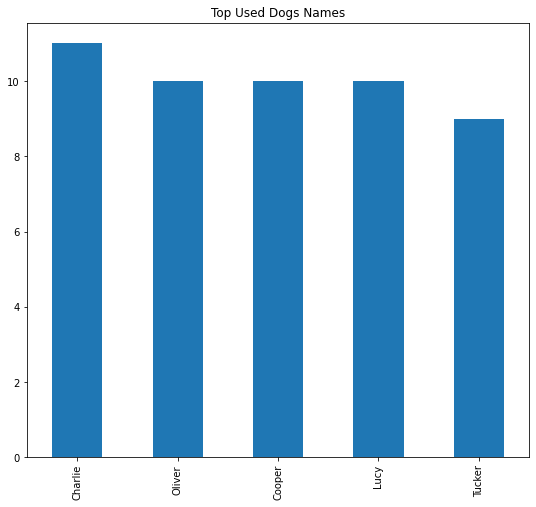

In [138]:
plt.figure(figsize=(9,8))
vis_df.dog_name.value_counts().head(5).plot(kind = 'bar')
plt.title('Top Used Dogs Names')

### Dogs Beauty Ratings

In [141]:
df.final_score.value_counts()

1.2      450
1.0      419
1.1      396
1.3      261
0.9      151
0.8       95
0.7       52
1.4       35
0.5       33
0.6       32
0.3       19
0.4       16
0.2        9
0.1        5
0.0        2
9.9        1
2.4        1
7.5        1
2.7        1
16.5       1
177.6      1
20.4       1
5.0        1
12.1       1
8.0        1
4.5        1
6.0        1
4.4        1
14.3       1
2.6        1
14.4       1
8.8        1
42.0       1
8.4        1
Name: final_score, dtype: int64

In [143]:
df_rate = df[df['final_score'] > 0]

In [145]:
df_rate.final_score.describe()

count    1992.000000
mean        1.229317
std         4.151673
min         0.100000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: final_score, dtype: float64

In [146]:
rate_labels = ['Good (0,1.875)', 'Beautiful (1.875, 3.75)', 'Cute (3.75,5.625)', 'Adorable (5.625,7.5)']

In [148]:
rate_proportions = pd.qcut(df_rate['final_score'], 4, labels = rate_labels)

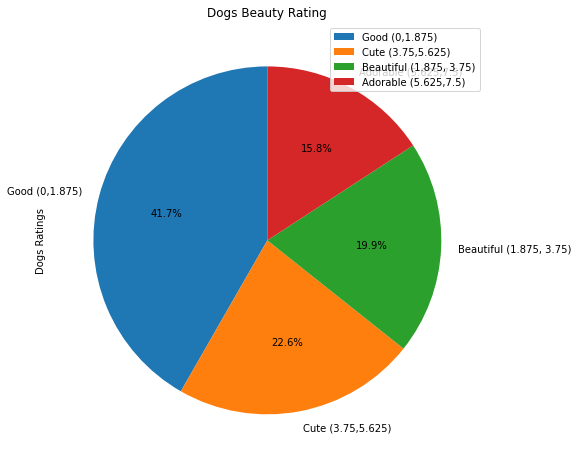

In [156]:
fig, ax = plt.subplots(figsize=(9,8))
rate_proportions.value_counts().plot(kind = 'pie', ax = ax, label = "Dogs Ratings", autopct='%1.1f%%', startangle=90)
plt.title('Dogs Beauty Rating')
plt.legend();

### Dogs' Stages

In [162]:
stage_dog = df.groupby('stage')

In [163]:
stage_dog.final_score.mean().sort_values(ascending = False).head()

stage
Doggo      1.463235
Pupper     1.352321
Puppo      1.217241
Unknown    1.200969
Floofer    1.187500
Name: final_score, dtype: float64

In [157]:
stage_df = df.loc[df["stage"] != "Unknown"]

Text(0.5, 1.0, 'Dogs Different Stages')

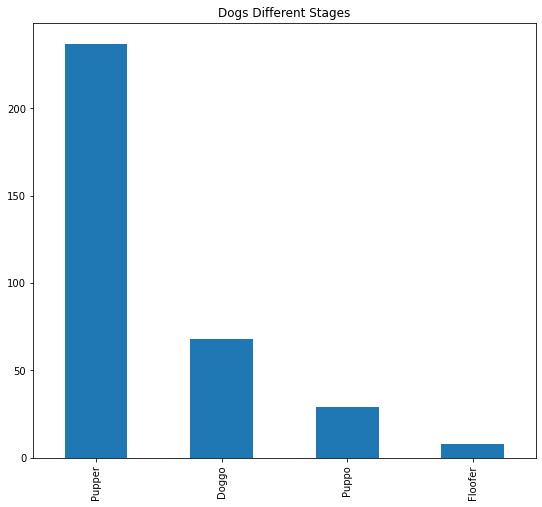

In [158]:
plt.figure(figsize=(9,8))
stage_df.stage.value_counts().plot(kind='bar')
plt.title('Dogs Different Stages')

### Insights:

1. Based on the first analysis block "Most Beautiful and Used Dog Names", we can conclude that although the mostly used name like "Charlie", "Oliver", "Cooper", and "Lucy are not the highly rated dogs. We find the highly rated dogs have "Atticus" as name.  

2. Based on the Dogs Beauty Ratings analysis, we can declare that approximately 16% of the dogs in the dataframe are adorable, or extremely beautiful. The majority of the dogs, or 41.7%, are rated as Good. This can be explained by the fact that the majority of people are rating dogs nearly to 10. Others who rate more than 10 (where the denominator is 10) have resulted in higher results and highly rated dogs.  

3. For the Dogs' Stages analysis, we figured out that most of the dogs in this dataframe are in the Pupper stage and the least present are in the Floofer stage. Yet, dogs in the Doggo phase are the highest rated. This can be explained by the fact that the younger the dog is, the cuter can be seen yielding to higher rates.